# 타이타닉

In [1]:
!curl -L https://bit.ly/2WflH16 -o titanic_train.csv
!curl -L https://bit.ly/2ZS7hGc -o titanic_test.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   146  100   146    0     0   1073      0 --:--:-- --:--:-- --:--:--  1073
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 61194  100 61194    0     0  58727      0  0:00:01  0:00:01 --:--:-- 58727
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   145  100   145    0     0    413      0 --:--:-- --:--:-- --:--:--   413
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 28629  100 28629    0     0  21128      0  0:00:01  0:00:01 --:--:-- 21128


In [0]:
import pandas as pd

train = pd.read_csv("./titanic_train.csv",index_col=["PassengerId"])

In [38]:
print(train.shape)

(891, 11)


In [39]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
test = pd.read_csv("./titanic_test.csv",index_col=["PassengerId"])

성별 카테고리 변수로 표현하는 컬럼 추가( 남성 : 0, 여성 : 1)

In [41]:
train.loc[train["Sex"] == "male", "Sex_encode"] = 0
train.loc[train["Sex"] == "female", "Sex_encode"] = 1

print(train.shape)
train[["Sex","Sex_encode"]].head()

(891, 12)


,Sex,Sex_encode
PassengerId,,
1,male,0.0
2,female,1.0
3,female,1.0
4,female,1.0
5,male,0.0


In [42]:
test.loc[test["Sex"] == "male","Sex_encode"] = 0
test.loc[test["Sex"] == "female","Sex_encode"] = 1

print(test.shape)
test[["Sex","Sex_encode"]].head()

(418, 11)


,Sex,Sex_encode
PassengerId,,
892,male,0.0
893,female,1.0
894,male,0.0
895,male,0.0
896,female,1.0


요금(fare)이 없는 항목이 하나 있다

In [43]:
test[pd.isnull(test["Fare"])]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode
PassengerId,,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,0.0


평균 값으로 결측값 대체

In [44]:
mean_fare = train["Fare"].mean()
print("평균 요금 = ${0:.4f}".format(mean_fare))

평균 요금 = $32.2042


In [45]:
test.loc[pd.isnull(test["Fare"]),"Fare"]=mean_fare
test[pd.isnull(test["Fare"])]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode
PassengerId,,,,,,,,,,,


승선한 항구이름 바꾸기

In [46]:
train_embarked = pd.get_dummies(train["Embarked"],prefix="Embarked")
train_embarked.head()

,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,1
5,0,0,1


In [47]:
test_embarked = pd.get_dummies(test["Embarked"],prefix="Embarked")
test_embarked.head()

,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,
892,0,1,0
893,0,0,1
894,0,1,0
895,0,0,1
896,0,0,1


새로만든 컬럼을 훈련/테스트 데이터에 붙이기

In [48]:
train = pd.concat([train,train_embarked],axis=1)
test = pd.concat([test,test_embarked],axis=1)
test[["Embarked","Embarked_C","Embarked_Q","Embarked_S"]].head()

,Embarked,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,
892,Q,0,1,0
893,S,0,0,1
894,Q,0,1,0
895,S,0,0,1
896,S,0,0,1


일부 데이터로 먼저 학습해보자<br>
성별,요금,탑승한 항구 부터

In [49]:
feature_names = ['Pclass', 'Sex_encode', 'Fare', 'Embarked_C','Embarked_Q','Embarked_S']

X_train = train[feature_names]
y_train = train['Survived']

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth = 3, random_state = 7)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=7, splitter='best')

In [32]:
feature_names

['Pclass', 'Sex_encode', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

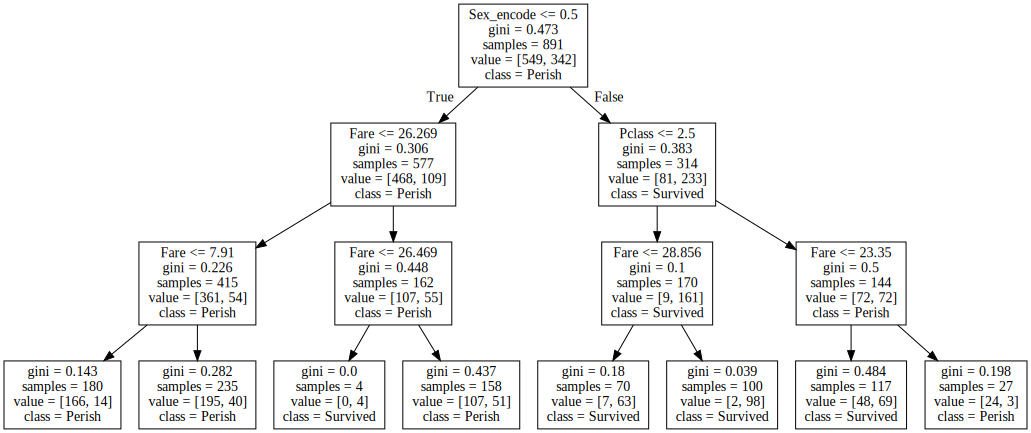

In [50]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(model,
                feature_names=feature_names,
                class_names=["Perish", "Survived"],
                out_file="decision-tree.dot")

with open("decision-tree.dot") as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

In [52]:
X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(418, 6)


,Pclass,Sex_encode,Fare,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,
892,3,0.0,7.8292,0,1,0
893,3,1.0,7.0000,0,0,1
894,2,0.0,9.6875,0,1,0
895,3,0.0,8.6625,0,0,1
896,3,1.0,12.2875,0,0,1


In [53]:
prediction = model.predict(X_test)

X_test["survived"] = prediction
X_test[:20]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Pclass,Sex_encode,Fare,Embarked_C,Embarked_Q,Embarked_S,survived
PassengerId,,,,,,,
892,3,0.0,7.8292,0,1,0,0
893,3,1.0,7.0000,0,0,1,1
894,2,0.0,9.6875,0,1,0,0
895,3,0.0,8.6625,0,0,1,0
896,3,1.0,12.2875,0,0,1,1
897,3,0.0,9.2250,0,0,1,0
898,3,1.0,7.6292,0,1,0,1
899,2,0.0,29.0000,0,0,1,0
900,3,1.0,7.2292,1,0,0,1
